In [1]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('lai_fpar_all.csv', usecols=[1]) #engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(1278, 1)


In [4]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 100

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network


In [5]:
print()

In [6]:
print(testX.shape)

(321, 100, 1)


In [7]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 100, 4)               96        
_________________________________________________________________
lstm_2 (LSTM)                (1, 4)                    144       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [22]:
for i in range(10):
    print(i)
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()


0
Epoch 1/1
 - 115s - loss: 0.0557
1
Epoch 1/1
 - 111s - loss: 0.0369
2
Epoch 1/1
 - 112s - loss: 0.0302
3
Epoch 1/1
 - 116s - loss: 0.0279
4
Epoch 1/1
 - 120s - loss: 0.0266
5
Epoch 1/1
 - 116s - loss: 0.0261
6
Epoch 1/1
 - 124s - loss: 0.0258
7
Epoch 1/1
 - 127s - loss: 0.0256
8
Epoch 1/1
 - 123s - loss: 0.0254
9
Epoch 1/1
 - 124s - loss: 0.0253


In [18]:
#model.save('sb_lai_10_look_back.h5')

In [8]:
model.reset_states()
model.load_weights('sb_lai_100_look_back.h5')

In [9]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [10]:
#trainPredict = model.predict(trainX, batch_size=batch_size)
#print(np.shape(trainPredict))
print(testPredict.shape)

(321, 1)


Train Score: 2.89 RMSE
Test Score: 2.98 RMSE


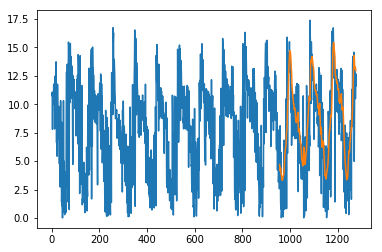

In [11]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#train_acc=accuracy_score(testY[0], testPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#test_acc=accuracy_score(testY[0], testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:])
#plt.plot(trainPredictPlot[:])
plt.plot(testPredictPlot[:])
plt.show()

In [41]:
plt.savefig('i.jpg')

<Figure size 432x288 with 0 Axes>